参考资料：https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

**导入基础包**

In [1]:
#packages
import pandas as pd
import numpy as np

from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**读取数据**

In [2]:
df = pd.read_csv('data_features_Class.csv') 

In [3]:
df.head()

,Unnamed: 0,Sample ID,Sampling month average,Sampling month,SRTd,COD,NH4N,TP,Gammaproteobacteria,Bacteroidia,...,Vampirivibrionia,Desulfovibrionia,Negativicutes,Holophagae,Leptospirae,metagenome,Kapabacteria,Lineage IIb,Desulfobacteria,Hydrogenedentia
0,0,SAKR1,18.0,55.0,12.0,771.97,61.4,7.2,35.535156,22.441406,...,0.054688,0.082031,0.027344,0.058594,0.144531,0.757812,0.058594,0.257812,0.003906,0.101562
1,1,SAKR2,18.0,55.0,12.0,771.97,61.4,7.2,32.203125,23.753906,...,0.035156,0.101562,0.023438,0.105469,0.160156,0.941406,0.066406,0.214844,0.003906,0.085938
2,2,SAKR3,18.0,55.0,12.0,771.97,61.4,7.2,31.246094,24.363281,...,0.035156,0.054688,0.046875,0.054688,0.167969,0.917969,0.042969,0.246094,0.000000,0.101562
3,3,SAKR4,18.0,55.0,12.0,771.97,61.4,7.2,34.714844,23.082031,...,0.042969,0.062500,0.066406,0.078125,0.171875,0.812500,0.078125,0.222656,0.015625,0.101562
4,4,SAKR5,18.0,55.0,12.0,771.97,61.4,7.2,30.414062,24.949219,...,0.039062,0.054688,0.035156,0.058594,0.226562,0.902344,0.070312,0.265625,0.000000,0.121094


In [4]:
df.shape

(1186, 59)

In [5]:
df.columns

Index(['Unnamed: 0', 'Sample ID', 'Sampling month average', 'Sampling month',
       'SRTd', 'COD', 'NH4N', 'TP', 'Gammaproteobacteria', 'Bacteroidia',
       'Unclassified', 'Alphaproteobacteria', 'Others', 'Clostridia',
       'Anaerolineae', 'Parcubacteria', 'Polyangia', 'Planctomycetes',
       'Verrucomicrobiae', 'Bdellovibrionia', 'Chlamydiae', 'Oligoflexia',
       'Phycisphaerae', 'Gracilibacteria', 'Actinobacteria', 'Bacilli',
       'Microgenomatia', 'Babeliae', 'ABY1', 'Saccharimonadia',
       'Acidimicrobiia', 'Omnitrophia', 'Cyanobacteriia', 'Acidobacteriae',
       'Myxococcia', 'Nanoarchaeia', 'Thermoleophilia', 'Blastocatellia',
       'OM190', 'Spirochaetia', 'Nitrospiria', 'Chloroflexia',
       'Kiritimatiellae', 'Ignavibacteria', 'Desulfuromonadia',
       'Campylobacteria', 'Gemmatimonadetes', 'Vicinamibacteria',
       'Fimbriimonadia', 'Vampirivibrionia', 'Desulfovibrionia',
       'Negativicutes', 'Holophagae', 'Leptospirae', 'metagenome',
       'Kapabacteria'

In [17]:
features = ['Sampling month average', 'Sampling month','SRTd', 'COD', 'NH4N', 'TP']
targets = ['Gammaproteobacteria', 'Bacteroidia',
       'Unclassified', 'Alphaproteobacteria', 'Others', 'Clostridia',
       'Anaerolineae', 'Parcubacteria', 'Polyangia', 'Planctomycetes',
       'Verrucomicrobiae', 'Bdellovibrionia', 'Chlamydiae', 'Oligoflexia',
       'Phycisphaerae', 'Gracilibacteria', 'Actinobacteria', 'Bacilli',
       'Microgenomatia', 'Babeliae', 'ABY1', 'Saccharimonadia',
       'Acidimicrobiia', 'Omnitrophia', 'Cyanobacteriia', 'Acidobacteriae',
       'Myxococcia', 'Nanoarchaeia', 'Thermoleophilia', 'Blastocatellia',
       'OM190', 'Spirochaetia', 'Nitrospiria', 'Chloroflexia',
       'Kiritimatiellae', 'Ignavibacteria', 'Desulfuromonadia',
       'Campylobacteria', 'Gemmatimonadetes', 'Vicinamibacteria',
       'Fimbriimonadia', 'Vampirivibrionia', 'Desulfovibrionia',
       'Negativicutes', 'Holophagae', 'Leptospirae', 'metagenome',
       'Kapabacteria', 'Lineage IIb', 'Desulfobacteria', 'Hydrogenedentia']

**简单的EDA**

In [18]:
df.isnull().sum()

Unnamed: 0                0
Sample ID                 0
Sampling month average    0
Sampling month            0
SRTd                      0
COD                       0
NH4N                      0
TP                        0
Gammaproteobacteria       0
Bacteroidia               0
Unclassified              0
Alphaproteobacteria       0
Others                    0
Clostridia                0
Anaerolineae              0
Parcubacteria             0
Polyangia                 0
Planctomycetes            0
Verrucomicrobiae          0
Bdellovibrionia           0
Chlamydiae                0
Oligoflexia               0
Phycisphaerae             0
Gracilibacteria           0
Actinobacteria            0
Bacilli                   0
Microgenomatia            0
Babeliae                  0
ABY1                      0
Saccharimonadia           0
Acidimicrobiia            0
Omnitrophia               0
Cyanobacteriia            0
Acidobacteriae            0
Myxococcia                0
Nanoarchaeia        

我们看到预测目标里面没有NA， 不过features里面有NA. 

部分features的空值较多，还不能直接drop. 

考虑给空值部分填充均值。

分拆数据

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Splitting the datasets into training and testing data.
train_data, test_data = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(train_data)}, {len(test_data)}")

Train and Test Size 948, 238


在train data 部分曲均值

In [21]:
train_data[features].mean()

Sampling month average     23.154379
Sampling month            115.381081
SRTd                       15.258321
COD                       430.108594
NH4N                       26.645109
TP                          6.274391
dtype: float64

In [22]:
df['Sampling month average'].fillna(23.154379, inplace = True)
df['Sampling month'].fillna(115.381081, inplace = True)
df['SRTd'].fillna(15.258321, inplace = True)
df['COD'].fillna(430.108594, inplace = True)
df['NH4N'].fillna(26.645109, inplace = True)
df['TP'].fillna(6.274391, inplace = True)

检查NA

In [23]:
df.isnull().sum()

Unnamed: 0                0
Sample ID                 0
Sampling month average    0
Sampling month            0
SRTd                      0
COD                       0
NH4N                      0
TP                        0
Gammaproteobacteria       0
Bacteroidia               0
Unclassified              0
Alphaproteobacteria       0
Others                    0
Clostridia                0
Anaerolineae              0
Parcubacteria             0
Polyangia                 0
Planctomycetes            0
Verrucomicrobiae          0
Bdellovibrionia           0
Chlamydiae                0
Oligoflexia               0
Phycisphaerae             0
Gracilibacteria           0
Actinobacteria            0
Bacilli                   0
Microgenomatia            0
Babeliae                  0
ABY1                      0
Saccharimonadia           0
Acidimicrobiia            0
Omnitrophia               0
Cyanobacteriia            0
Acidobacteriae            0
Myxococcia                0
Nanoarchaeia        

重定义训练和测试集

In [24]:
# Splitting the datasets into training and testing data.
train_data, test_data = train_test_split(df, train_size=0.8, test_size=0.2, shuffle=False)

# Output the train and test data size
print(f"Train and Test Size {len(train_data)}, {len(test_data)}")

Train and Test Size 948, 238


**建模**

In [25]:
from sklearn import linear_model 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge #导入岭回归模型
from sklearn.linear_model import SGDRegressor
# XGBoost Classifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [26]:
X_train = train_data[features]
y_train = train_data[targets]
X_test = test_data[features]
y_test = test_data[targets]

In [27]:
neigh = KNeighborsRegressor(n_neighbors=20)

In [28]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', neigh)
])

训练模型

In [29]:
model.fit(X_train, y_train)
print(f'R^2 Train: {model.score(X_train, y_train):0.4}')

R^2 Train: 0.3352


利用训练好的模型做测试

In [30]:
y_preds = model.predict(X_test)

In [31]:
y_preds

array([[2.66458984e+01, 3.22054688e+01, 2.28046875e+00, ...,
        9.08203125e-02, 4.76562500e-02, 8.43750000e-02],
       [3.15701172e+01, 3.07759766e+01, 1.43164062e+00, ...,
        7.22656250e-02, 1.97265625e-02, 5.54687500e-02],
       [3.15701172e+01, 3.07759766e+01, 1.43164062e+00, ...,
        7.22656250e-02, 1.97265625e-02, 5.54687500e-02],
       ...,
       [4.02986328e+01, 2.80195312e+01, 1.04062500e+00, ...,
        2.07031250e-02, 8.98437500e-03, 8.24218750e-02],
       [4.02986328e+01, 2.80195312e+01, 1.04062500e+00, ...,
        2.07031250e-02, 8.98437500e-03, 8.24218750e-02],
       [4.02986328e+01, 2.80195312e+01, 1.04062500e+00, ...,
        2.07031250e-02, 8.98437500e-03, 8.24218750e-02]])

**结果可视化**

展示第一个ID的预测结果。

In [32]:
y_preds[0]

array([2.66458984e+01, 3.22054688e+01, 2.28046875e+00, 6.07910156e+00,
       1.59726562e+00, 6.35742188e-01, 2.90292969e+00, 1.00781250e+00,
       4.11718750e+00, 1.23261719e+00, 1.17285156e+00, 6.04296875e-01,
       4.82031250e-01, 4.34960937e-01, 1.21542969e+00, 3.16015625e-01,
       1.45957031e+00, 2.14843750e-01, 7.10937500e-02, 1.08593750e-01,
       1.60937500e-01, 5.08398438e-01, 1.08378906e+00, 1.05273437e-01,
       2.12890625e-02, 3.93945312e-01, 3.40429688e-01, 2.77343750e-02,
       2.00000000e-01, 2.40937500e+00, 8.87500000e-01, 3.47656250e-02,
       3.84375000e+00, 2.67187500e-01, 3.10546875e-02, 6.92187500e-01,
       1.53710938e-01, 8.88281250e-01, 3.10937500e-01, 5.39257813e-01,
       2.32031250e-01, 3.05468750e-01, 5.07812500e-02, 3.92578125e-02,
       2.02929688e-01, 8.97460938e-01, 1.24414063e-01, 2.40820312e-01,
       9.08203125e-02, 4.76562500e-02, 8.43750000e-02])

In [33]:
y_test.iloc[0].tolist()

[27.25390625,
 17.56640625,
 1.76171875,
 8.9609375,
 1.875,
 0.4921875,
 4.35546875,
 1.2109375,
 12.34765625,
 0.92578125,
 1.578125,
 0.41015625,
 0.3984375,
 0.62109375,
 1.14453125,
 0.17578125,
 6.9609375,
 0.16796875,
 0.07421875,
 0.0625,
 0.1328125,
 0.41015625,
 0.671875,
 0.0078125,
 0.01171875,
 0.46484375,
 0.28125,
 0.04296875,
 0.12890625,
 0.9921875,
 0.89453125,
 0.09765625,
 1.6210937500000002,
 0.03515625,
 0.28125,
 1.43359375,
 0.140625,
 0.14453125,
 0.4921875,
 0.60546875,
 0.30859375,
 0.19140625,
 0.08984375,
 0.046875,
 1.07421875,
 0.25,
 0.18359375,
 0.41796875,
 0.15625,
 0.015625,
 0.03125]

In [34]:
c = {"classes":targets,
     "predictions":y_preds[0],
    "real":y_test.iloc[0].tolist() }

In [35]:
com = pd.DataFrame(c)
com = com.set_index('classes')
com

,predictions,real
classes,,
Gammaproteobacteria,26.645898,27.253906
Bacteroidia,32.205469,17.566406
Unclassified,2.280469,1.761719
Alphaproteobacteria,6.079102,8.960938
Others,1.597266,1.875000
Clostridia,0.635742,0.492188
Anaerolineae,2.902930,4.355469
Parcubacteria,1.007812,1.210938
Polyangia,4.117188,12.347656


预测和实际结果的柱状图对比

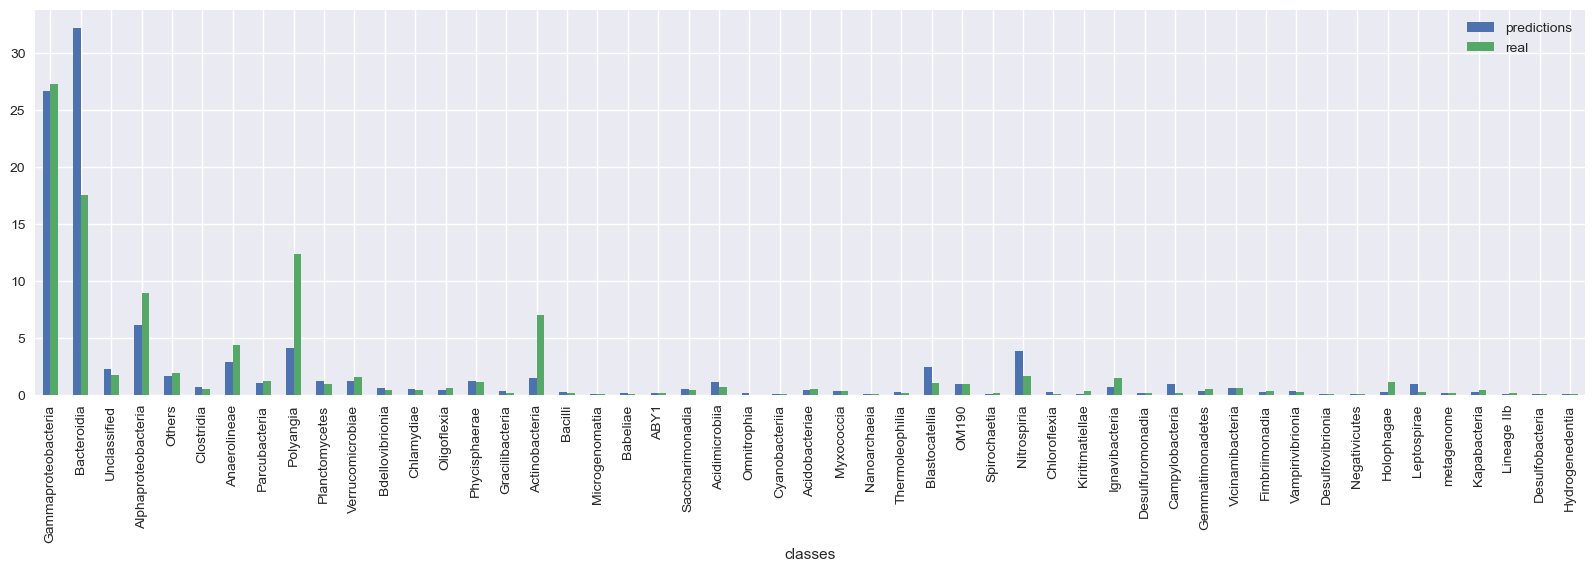

In [36]:
com.plot(kind='bar',figsize=(20,5));

预测和实际结果的散点图对比。

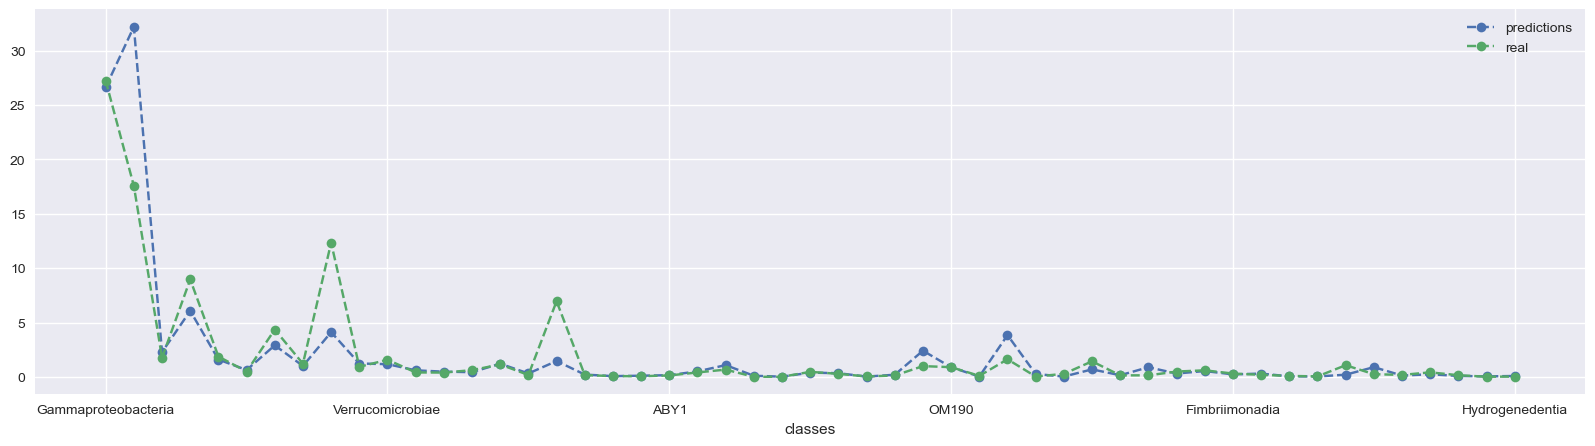

In [37]:
com.plot(kind='line',style='--o',figsize=(20,5));

上面是第一个预测结果和实际结果的对比，修改参数可以对比其他列。也可以汇总对比均值。

**模型评估**

训练集部分

R^2

In [38]:
print(f'R^2 Train: {model.score(X_train, y_train):0.4}')

R^2 Train: 0.3352


In [39]:
from sklearn import metrics

训练集的MSE

In [40]:
y_preds2 = model.predict(X_train)
metrics.mean_squared_error(y_train, y_preds2)

2.9486814165498005

测试集部分

In [41]:
MSE = metrics.mean_squared_error(y_test, y_preds)
MSE

7.17728249906099

In [42]:
RMSE = metrics.mean_squared_error(y_test, y_preds)**0.5
RMSE

2.6790450722339463

In [43]:
MAE = metrics.mean_absolute_error(y_test, y_preds)
MAE

0.8896001966963251

In [44]:
MAPE = metrics.mean_absolute_percentage_error(y_test, y_preds)
MAPE

87620550843891.48

# 调参和优化

In [45]:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV

In [46]:
# Cross-validation
tscv = TimeSeriesSplit(n_splits=5)

In [47]:
# Get parameters list
model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('regressor', KNeighborsRegressor(n_neighbors=20))],
 'verbose': False,
 'scaler': StandardScaler(),
 'regressor': KNeighborsRegressor(n_neighbors=20),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'regressor__algorithm': 'auto',
 'regressor__leaf_size': 30,
 'regressor__metric': 'minkowski',
 'regressor__metric_params': None,
 'regressor__n_jobs': None,
 'regressor__n_neighbors': 20,
 'regressor__p': 2,
 'regressor__weights': 'uniform'}

In [48]:
# Perform Gridsearch and fit
param_grid = {"regressor__n_neighbors": [2, 4, 6, 8, 10,12,14,16,18,20,22,24,26,28,30]}

In [49]:
gs = GridSearchCV(model, param_grid, n_jobs=-1, cv=tscv, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor',
                                        KNeighborsRegressor(n_neighbors=20))]),
             n_jobs=-1,
             param_grid={'regressor__n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16,
                                                    18, 20, 22, 24, 26, 28,
                                                    30]},
             verbose=1)

In [50]:
# Best Estimator
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', KNeighborsRegressor(n_neighbors=12))])

In [51]:
print(f'R^2 Train: {gs.score(X_train, y_train):0.4}')

R^2 Train: 0.4498


用最优化的参数，r方变大了。

In [52]:
y_preds1 = gs.predict(X_test)

In [53]:
MSE = metrics.mean_squared_error(y_test, y_preds1)
MSE

8.383714374947935

MSE也更大。不过这个调参优化是通过了分组验证，所以能更好的避免过拟合。缺点就是，用调参后的参数，无论测试还是验证结果都偏差。最后我们确认用之前的20作为参数。

作为对比，我们打印训练集的MSE，看看差距大不大。

In [54]:
y_preds2 = gs.predict(X_train)
metrics.mean_squared_error(y_train, y_preds2)

2.3692173106177945